<a href="https://colab.research.google.com/github/triptisingh22a/Sentiment_Analysis-of-Linkedin/blob/main/Linkedln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis of Professional Social Network Linkedin

In [ ]:
pip install pandas matplotlib textblob


Sentiment Summary:
 sentiment
Positive    486
Negative     32
Neutral      16
Name: count, dtype: int64

Category Summary:
 category
Technology       191
Hiring           171
Other            111
Career Growth     59
Motivational       2
Name: count, dtype: int64


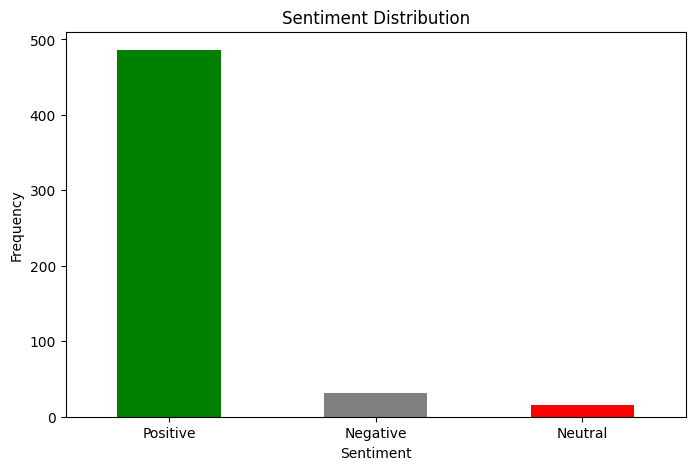

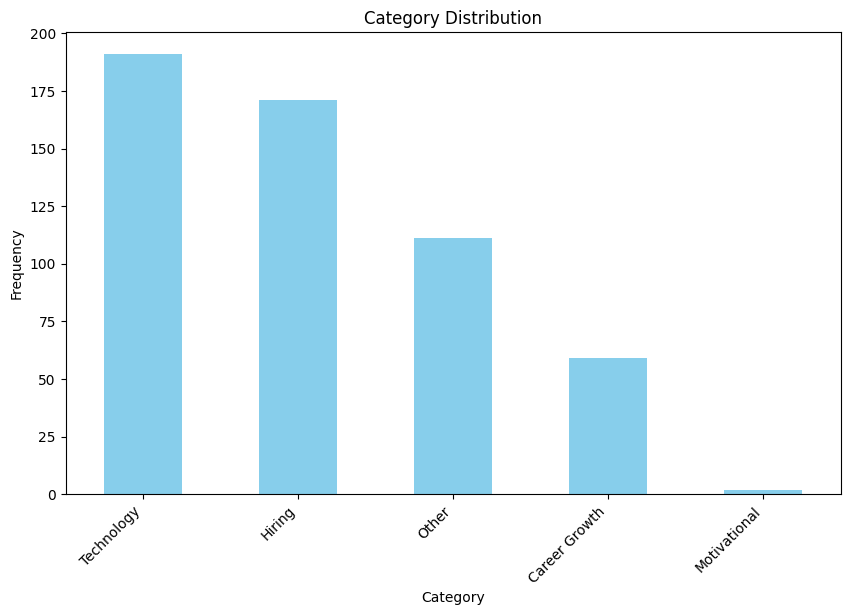

In [ ]:
import pandas as pd
import numpy as np
import json
from textblob import TextBlob
import matplotlib.pyplot as plt


# Load the JSON file
file_path = '/content/datacons.json'  # Replace with your file path
with open(file_path, 'r') as f:
    data = json.load(f)

# Flatten the data into a DataFrame
data_dict = {"user": [], "post": []}

for user, posts in data.items():
    for post in posts:
        data_dict["user"].append(user)
        data_dict["post"].append(post)

df = pd.DataFrame(data_dict)

# Sentiment Analysis Function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['sentiment_score'] = df['post'].apply(analyze_sentiment)
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)

# Categorizing posts
def categorize_post(post):
    if "hiring" in post.lower() or "job" in post.lower():
        return "Hiring"
    elif "career" in post.lower() or "success" in post.lower():
        return "Career Growth"
    elif "ai" in post.lower() or "technology" in post.lower():
        return "Technology"
    elif "motivational" in post.lower() or "struggle" in post.lower():
        return "Motivational"
    else:
        return "Other"

df['category'] = df['post'].apply(categorize_post)

# Summarize Data
sentiment_summary = df['sentiment'].value_counts()
category_summary = df['category'].value_counts()

# Display Results
print("Sentiment Summary:\n", sentiment_summary)
print("\nCategory Summary:\n", category_summary)

# Plot Sentiment Distribution
plt.figure(figsize=(8, 5))
sentiment_summary.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

# Plot Category Distribution
plt.figure(figsize=(10, 6))
category_summary.plot(kind='bar', color='skyblue')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()


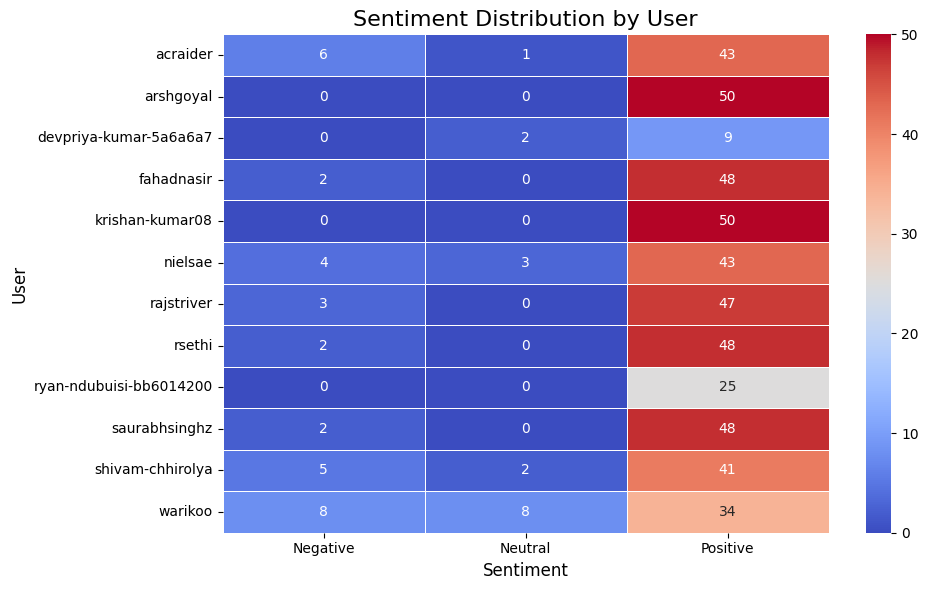

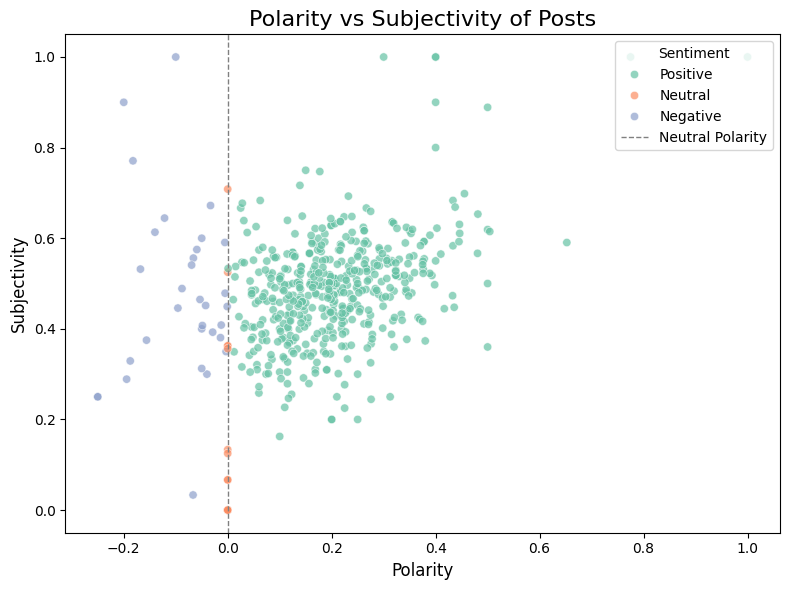

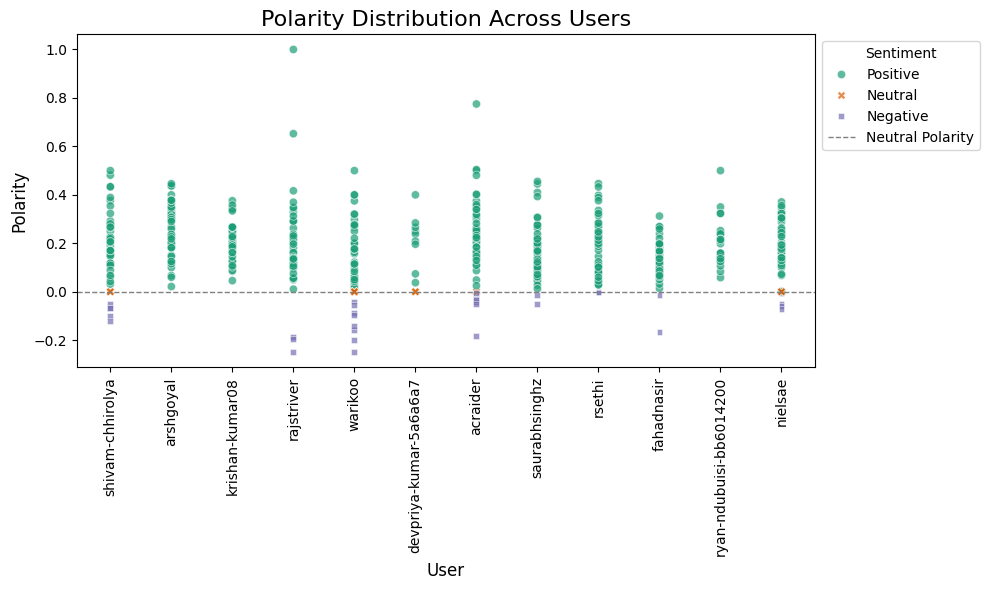

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap: Sentiment Distribution
def plot_sentiment_distribution(df):
    # Create a pivot table for sentiment distribution by user
    sentiment_pivot = df.pivot_table(
        index='user',
        columns='sentiment',
        values='post',
        aggfunc='count',
        fill_value=0
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        sentiment_pivot,
        annot=True,
        fmt="d",
        cmap="coolwarm",
        linewidths=0.5
    )
    plt.title("Sentiment Distribution by User", fontsize=16)
    plt.xlabel("Sentiment", fontsize=12)
    plt.ylabel("User", fontsize=12)
    plt.tight_layout()
    plt.show()

# Scatter Plot: Polarity vs. Subjectivity
def plot_polarity_vs_subjectivity(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x='polarity',
        y='subjectivity',
        hue='sentiment',
        alpha=0.7,
        palette="Set2"
    )
    plt.axvline(0, color='gray', linestyle='--', linewidth=1, label='Neutral Polarity')
    plt.title("Polarity vs Subjectivity of Posts", fontsize=16)
    plt.xlabel("Polarity", fontsize=12)
    plt.ylabel("Subjectivity", fontsize=12)
    plt.legend(title="Sentiment", loc='upper right')
    plt.tight_layout()
    plt.show()

# Scatter Plot: Polarity Distribution Across Users
def plot_polarity_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x='user',
        y='polarity',
        hue='sentiment',
        style='sentiment',
        alpha=0.7,
        palette="Dark2"
    )
    plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Neutral Polarity')
    plt.title("Polarity Distribution Across Users", fontsize=16)
    plt.xlabel("User", fontsize=12)
    plt.ylabel("Polarity", fontsize=12)
    plt.legend(title="Sentiment", loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=90)  # Rotate x-axis for better readability if user IDs are many
    plt.tight_layout()
    plt.show()

# Example Usage
# Call these functions to generate visualizations
plot_sentiment_distribution(df)
plot_polarity_vs_subjectivity(df)
plot_polarity_distribution(df)



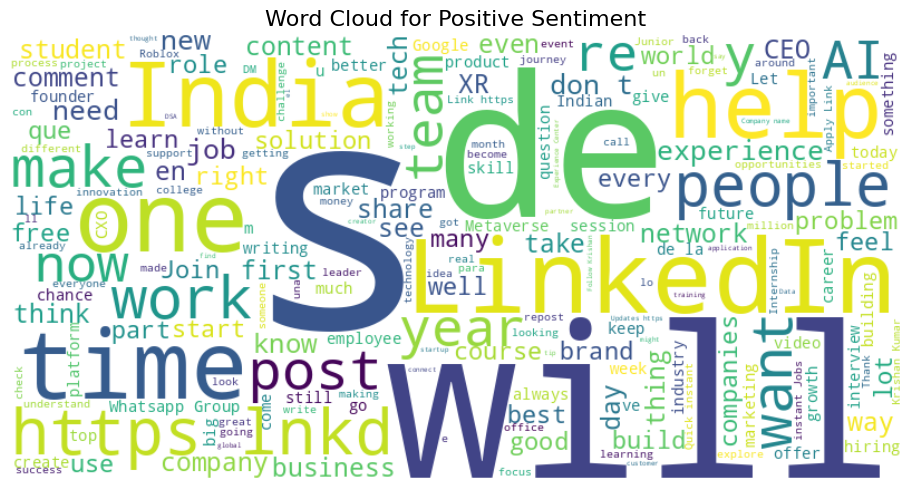

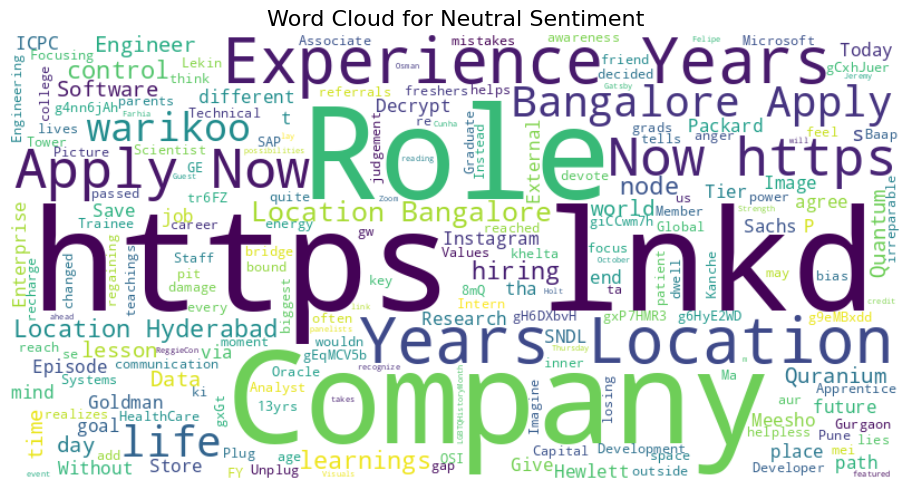

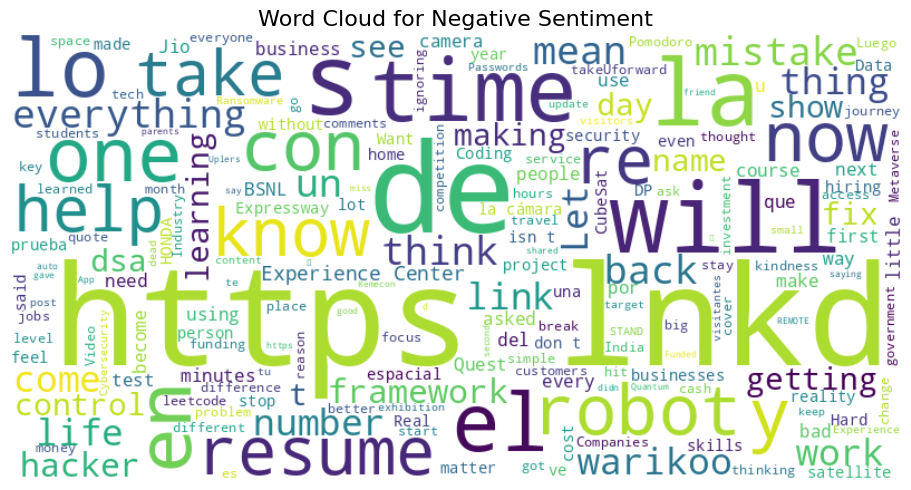

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for a specific sentiment
def generate_wordcloud(df, sentiment):
    # Filter posts by sentiment
    sentiment_posts = df[df['sentiment'] == sentiment]['post']

    # Combine all posts into a single string
    text = " ".join(sentiment_posts)

    # Create a WordCloud object
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="viridis",
        max_words=200,
        contour_width=1,
        contour_color="steelblue"
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment", fontsize=16)
    plt.tight_layout()
    plt.show()

# Generate Word Clouds for each sentiment
generate_wordcloud(df, "Positive")
generate_wordcloud(df, "Neutral")
generate_wordcloud(df, "Negative")


In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
import json
from textblob import TextBlob

# Load the JSON file
file_path = '/content/datacons.json'  # Replace with your file path
with open(file_path, 'r') as f:
    data = json.load(f)

# Flatten the data into a DataFrame
data_dict = {"user": [], "post": []}

for user, posts in data.items():
    for post in posts:
        data_dict["user"].append(user)
        data_dict["post"].append(post)

df = pd.DataFrame(data_dict)

# Sentiment Analysis Function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    classification = 'Positive' if polarity > 0 else 'Negative' if polarity < 0 else 'Neutral'
    return polarity, subjectivity, classification

# Apply sentiment analysis
df[['polarity', 'subjectivity', 'sentiment']] = df['post'].apply(
    lambda x: pd.Series(analyze_sentiment(x)))

# Output Results
print("\nDetailed Sentiment Analysis Results:")
print(df.head(10))  # Display the first 10 rows with sentiment details

# Summarize Results
sentiment_summary = df['sentiment'].value_counts()
print("\nSentiment Summary:")
print(sentiment_summary)

# Save Detailed Results to a File (Optional)
output_file = 'sentiment_analysis_results.csv'
df.to_csv(output_file, index=False)
print(f"\nDetailed results saved to {output_file}")



Detailed Sentiment Analysis Results:
               user                                               post  \
0  shivam-chhirolya  Hired a fresher with no experience. \n\nHe had...   
1  shivam-chhirolya  Google is hiring (Few referrals Available) !!\...   
2  shivam-chhirolya  NASA is asking people to create a rescue syste...   
3  shivam-chhirolya  Hi,\n\nWith 2025 just around the corner, I’m s...   
4  shivam-chhirolya  2016: ‘I don’t trust Bitcoin.’ \n2024: ‘Bitcoi...   
5  shivam-chhirolya  Stop Scrolling! 🚨 your Data Scientist Dream is...   
6  shivam-chhirolya  Transform your career dreams into reality! \n\...   
7  shivam-chhirolya  Why do top companies prioritize DSA,even when ...   
8  shivam-chhirolya  Before cracking the Interview,\n— I failed to ...   
9  shivam-chhirolya  Meesho is hiring freshers !!\nGoldman Sachs is...   

   polarity  subjectivity sentiment  
0  0.116667      0.400000  Positive  
1  0.225000      0.225000  Positive  
2  0.031019      0.638889  Positi

In [ ]:
pip install --upgrade transformers torch textblob


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3
